# Análise do COVID-19 no Brasil (Infectados)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv").fillna(0)
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,120,170,174,237,273,281,299,349,367
1,0,Albania,41.1533,20.1683,0,0,0,0,0,0,...,197,212,223,243,259,277,304,333,361,377
2,0,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,454,511,584,716,847,986,1171,1251,1320,1423
3,0,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,308,334,370,376,390,428,439,466,501,525
4,0,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,7,7,7,8,8,8,10,14,16
5,0,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,7,7,7,7,7,9,15,15,15,15
6,0,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,690,745,820,1054,1054,1133,1265,1451,1451,1554
7,0,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,407,424,482,532,571,663,736,770,822,833
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,71,77,78,80,84,87,91,93,96,96
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637


## 2. Total de casos diários no mundo (ordenação decrescente)

In [2]:
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

In [3]:
confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,140886,161807,188172,213372,243453,275586,308850,337072,366614,366614
Spain,0,0,0,0,0,0,0,0,0,0,...,80110,87956,95923,104118,112065,119199,126168,131646,136675,136675
Italy,0,0,0,0,0,0,0,0,0,2,...,97689,101739,105792,110574,115242,119827,124632,128948,132547,132547
Germany,0,0,0,0,0,1,4,4,4,5,...,62095,66885,71808,77872,84794,91159,96092,100123,103374,103374
France,0,0,2,3,3,3,4,5,5,5,...,40708,45170,52827,57749,59929,65202,90848,93773,98963,98963
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,82122,82198,82279,82361,82432,82511,82543,82602,82665,82665
Iran,0,0,0,0,0,0,0,0,0,0,...,38309,41495,44605,47593,50468,53183,55743,58226,60500,60500
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,19780,22453,25481,29865,34173,38689,42477,48436,52279,52279
Turkey,0,0,0,0,0,0,0,0,0,0,...,9217,10827,13531,15679,18135,20921,23934,27069,30217,30217


### 2.1 Total de casos diários somente no Brasil

In [4]:
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
confirmedCasesByDayBrazilDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,4256,4579,5717,6836,8044,9056,10360,11130,12161,12161


In [5]:
dates = list(confirmedCasesByDayBrazilDf)[:-1]
infected = confirmedCasesByDayBrazilDf.iloc[0,:-1].astype('int32')

dfForPlot = pd.DataFrame(
    {'date': dates, 'infected': infected})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail(10)

,date,infected
3/28/20,2020-03-28,3904
3/29/20,2020-03-29,4256
3/30/20,2020-03-30,4579
3/31/20,2020-03-31,5717
4/1/20,2020-04-01,6836
4/2/20,2020-04-02,8044
4/3/20,2020-04-03,9056
4/4/20,2020-04-04,10360
4/5/20,2020-04-05,11130
4/6/20,2020-04-06,12161


Text(0, 0.5, 'Number of cases')

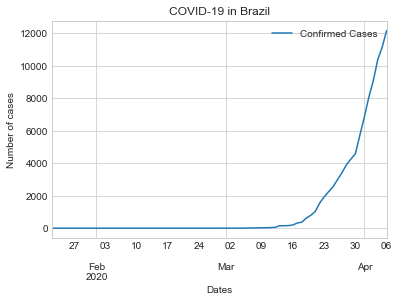

In [6]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

### 2.2 Total de casos diários somente na Itália

In [7]:
confirmedCasesByDayItalyDf = sortedConfirmedCasesGroupedDf.loc[['Italy']]
confirmedCasesByDayItalyDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,2,...,97689,101739,105792,110574,115242,119827,124632,128948,132547,132547


In [8]:
datesItaly = list(confirmedCasesByDayItalyDf)[:-1]
infectedItaly = confirmedCasesByDayItalyDf.iloc[0,:-1]

dfForPlotItaly = pd.DataFrame(
    {'date': datesItaly, 'infected': infectedItaly})
dfForPlotItaly['date'] = pd.to_datetime(dfForPlotItaly['date'])
dfForPlotItaly.tail()

,date,infected
4/2/20,2020-04-02,115242
4/3/20,2020-04-03,119827
4/4/20,2020-04-04,124632
4/5/20,2020-04-05,128948
4/6/20,2020-04-06,132547


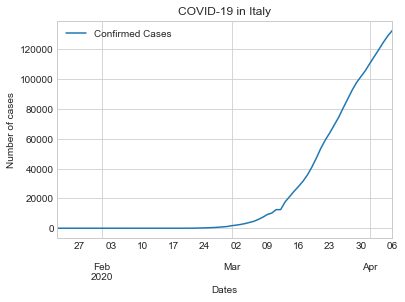

In [9]:
fig = plt.figure()
ax = plt.axes()
dfForPlotItaly.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Italy")
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.legend()

## 3. Total de casos diários acumulados por país (ordenação decrescente)

In [10]:
confirmedCasesOnlyDf = confirmedCasesDf.drop(confirmedCasesDf.columns.difference(['Country/Region','Confirmed Cases']), 1)
confirmedCasesOnlyDf = confirmedCasesOnlyDf.sort_values(by=['Confirmed Cases'],ascending=False)

sortedConfirmedCasesOnlyGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesOnlyDf)
sortedConfirmedCasesOnlyGroupedDf

,Confirmed Cases
Country/Region,
US,366614
Spain,136675
Italy,132547
Germany,103374
France,98963
...,...
Gambia,4
Burundi,3
Papua New Guinea,2


### 3.1 Total de casos diários acumulados no Brasil

In [11]:
confirmedCasesTotalBrazilDf = sortedConfirmedCasesOnlyGroupedDf.loc[['Brazil']]
confirmedCasesTotalBrazilDf

,Confirmed Cases
Country/Region,
Brazil,12161


## 4. Previsão por meio da Regressão

### 4.0 Dados comuns a todos os algoritmos abaixo

In [12]:
def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'infected': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', label='Confirmed Cases')
    df.set_index('dates')['infected'].plot(legend=True, grid=True, label='Predicted Cases')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [13]:
import datetime

diasASimular = 60
dfForPlotDaysWithInfected = dfForPlot[dfForPlot['infected'] != 0]

XTrain = np.arange(0, len(dfForPlotDaysWithInfected['date']))
yTrain = dfForPlotDaysWithInfected['infected']

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['infected']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)

### 4.1 Regressão Linear

In [14]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([    0,   241,   481,   722,   962,  1203,  1444,  1684,  1925,
        2166,  2406,  2646,  2887,  3127,  3368,  3609,  3849,  4090,
        4330,  4571,  4812,  5052,  5293,  5534,  5774,  6015,  6256,
        6496,  6737,  6977,  7218,  7459,  7699,  7940,  8181,  8421,
        8662,  8903,  9143,  9384,  9625,  9865, 10106, 10346, 10587,
       10828, 11068, 11309, 11550, 11790, 12031, 12272, 12512, 12753,
       12993, 13234, 13475, 13715, 13956, 14197, 14437, 14678, 14919,
       15159, 15400, 15641, 15881, 16122, 16362, 16603, 16844, 17084,
       17325, 17566, 17806, 18047, 18288, 18528, 18769, 19009, 19250,
       19491, 19731, 19972, 20213, 20453, 20694, 20935, 21175, 21416,
       21657, 21897, 22138, 22378, 22619, 22860, 23100, 23341, 23582,
       23822, 24063])

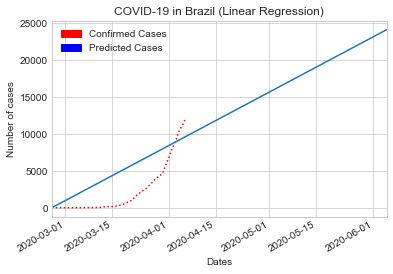

In [15]:
plotGraph(X, y, XRealCases, yRealCases, "Linear Regression")

### 4.2 Polynomial Regression 2D

In [16]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

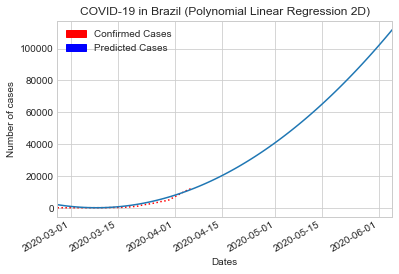

In [17]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 2D")

### 4.3 Polynomial Regression 3D

In [18]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

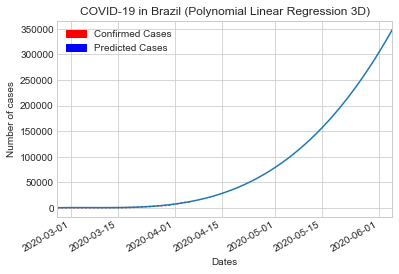

In [19]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 3D")

### 4.4 Polynomial Regression 4D

In [20]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

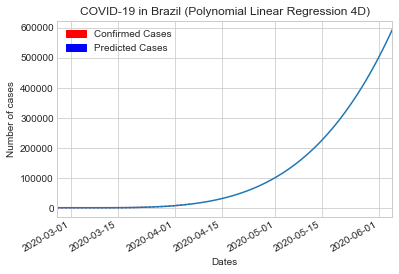

In [21]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 4D")

### 4.5 Logistic and Exponential Curve

In [22]:
def logistic_model(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))

In [23]:
def exponential_model(x, a, b, c):
    return a*np.exp(b*(x-c+10))

In [24]:
import datetime

dfForPlotBrazil = dfForPlot
dfForPlotBrazil = dfForPlotBrazil[dfForPlotBrazil['infected'] > 0]
date_first_infection = dfForPlotBrazil['date'].iloc[0]

dfForPlotBrazil.loc[:,'date'] = dfForPlotBrazil['date'].map(lambda x: (x - date_first_infection).days)
dfForPlotBrazil

c:\users\pichau\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,infected
2/26/20,0,1
2/27/20,1,1
2/28/20,2,1
2/29/20,3,2
3/1/20,4,2
3/2/20,5,2
3/3/20,6,2
3/4/20,7,4
3/5/20,8,4
3/6/20,9,13


Infection speed     = 5.136
Total infected      = 23243
40 dias =  2020-04-06 00:00:00


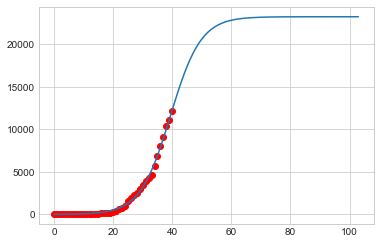

In [25]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

x = list(dfForPlotBrazil.iloc[:, 0])
y = list(dfForPlotBrazil.iloc[:, 1])
fit = curve_fit(logistic_model, x, y, maxfev=100000)

sol = int(fsolve(lambda x: logistic_model(x, fit[0][0], fit[0][1], fit[0][2]) - int(fit[0][2]), fit[0][1]))
end = date_first_infection + datetime.timedelta(days=sol)

pred_x = list(range(max(x), sol))
y_l=[logistic_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotBrazil.iloc[:, 0]), list(dfForPlotBrazil.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_l, label="Logistic model")

peakday = date_first_infection + datetime.timedelta(days=fit[0][1])
print("Infection speed     = %.3f" % fit[0][0])
print("Total infected      = %.0f" % fit[0][2])
print("40 dias = ", date_first_infection + datetime.timedelta(days=40))

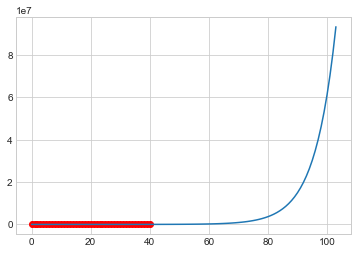

In [26]:
x = list(dfForPlotBrazil.iloc[:, 0])
y = list(dfForPlotBrazil.iloc[:, 1])
fit = curve_fit(exponential_model, x, y)

y_e = [exponential_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotBrazil.iloc[:, 0]), list(dfForPlotBrazil.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_e, label="Exponential model")